# 7. Feature Engineering - 신용거래 이상탐지 데이터 다루기 [프로젝트]

---
## Step 1. 이것만큼은 꼭 해보세요!
프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제/변환하시되, 아래 내용만큼은 반드시 실습해봅시다.

#### 1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.
#### 2. 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다.   
[힌트] 구매 금액, 시간 등의 변수를 이용할 수 있습니다.
   
## Step 2. 이런것도 해볼 수 있어요!
자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.   
강의의 범위를 벗어나는 개념이 필요할 수 있으니, 인터넷 검색도 적극 활용해보세요.

#### 1. 데이터의 위도/경도 정보를 활용해볼 수 있을까요?
#### 2. 통계적 관점으로 접근하여 유용한 변수를 만들어낼 수 있을까요?
---

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cc_df = pd.read_csv('~/aiffel/0123_ManageData/data/fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.nunique()

trans_date_trans_time    488474
cc_num                      124
merchant                    693
category                     14
amt                       36446
first                        92
last                        102
gender                        2
street                      124
city                        121
state                        44
zip                         124
lat                         124
long                        124
city_pop                    122
job                         110
dob                         123
trans_num                491134
unix_time                488477
merch_lat                484503
merch_long               487445
is_fraud                      2
dtype: int64

1. 데이터 타입
- trans_date_trans_time : object > datetime
- category              : object > int (원핫인코딩)
- gender                : object > int (원핫인코딩)
- dob                   : object > datetime

2. 결측치 없음

3. 데이터 내용
- trans_date_trans_time: date and time of the transaction
- cc_num: credit card number of customer
- merchant: customer is paying to which merchant(like Amazon, Walmart)
- amt: the amount of transaction
- first: first name of customer
- last: last anme of customer
- gender: gender of the customer
- street, city, state: address of the customer
- zip: zip code of the transaction
- lat: latitude of the customer
- long: longitude of customer
- city_pop: population of the city he is living
- job: job of customer
- dob: date of birth of the customer
- trans_num: unique transaction number for each and every transaction
- unix_time: time of the transaction in Unix( generally not used in our analysis as it is unique mostly)
- merch_lat: merchant lattitude
- merch_long: merchant longitude
- is_fraud: whether transaction is fraud or no (1- fraud, 0- not fraud)

In [7]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 2. 데이터 정리

### (1) 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.

In [8]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [9]:
def drop_func(data):
    data.drop(['merchant','first','last','street','city','zip','job','trans_num','unix_time', 'state', 'city_pop'], axis = 1, inplace= True)
    return data

In [10]:
cc_df = drop_func(cc_df)

In [11]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0


### (2) 데이터 타입 관리 (object to datetime)

- 'trans_date_trans_time'와 'dob' 의 데이터타입 datetime으로 변경하기

In [12]:
from datetime import datetime as dt

cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])
cc_df['dob'] = pd.to_datetime(cc_df['dob'])

In [13]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   gender                 491134 non-null  object        
 5   lat                    491134 non-null  float64       
 6   long                   491134 non-null  float64       
 7   dob                    491134 non-null  datetime64[ns]
 8   merch_lat              491134 non-null  float64       
 9   merch_long             491134 non-null  float64       
 10  is_fraud               491134 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 41.2+ MB


In [14]:
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0


### (3) 새로운 Feature 생성

#### 거래 시간대, 월, 요일  컬럼 생성

- 'Transaction Hour' 컬럼 생성하기

In [15]:
cc_df['transaction_hour'] = cc_df['trans_date_trans_time'].dt.hour
cc_df['transaction_hour']

0          0
1          0
2          0
3          0
4          0
          ..
491129    23
491130    23
491131    23
491132    23
491133    23
Name: transaction_hour, Length: 491134, dtype: int64

- 'Transaction Month' 컬럼 생성하기

In [16]:
cc_df['transaction_month'] = cc_df['trans_date_trans_time'].dt.month
cc_df['transaction_month']

0          1
1          1
2          1
3          1
4          1
          ..
491129    12
491130    12
491131    12
491132    12
491133    12
Name: transaction_month, Length: 491134, dtype: int64

- 'Transaction Week' 컬럼 생성하기

In [17]:
cc_df['transaction_week'] = cc_df['trans_date_trans_time'].dt.weekday
cc_df['transaction_week']

0         1
1         1
2         1
3         1
4         1
         ..
491129    3
491130    3
491131    3
491132    3
491133    3
Name: transaction_week, Length: 491134, dtype: int64

In [18]:
cc_df = cc_df.drop(['trans_date_trans_time'], axis=1)

In [19]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,dob,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,0,1,1
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,1980-12-21,40.079588,-74.848087,0,0,1,1
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,1974-07-19,40.021888,-74.228188,0,0,1,1
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,1971-11-05,42.360426,-83.552316,0,0,1,1
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,1977-02-22,29.737426,-90.853194,0,0,1,1


#### 거래 나이 컬럼 생성

In [20]:
cc_df['age'] = 2024 - cc_df['dob'].dt.year
cc_df['age']

0         46
1         44
2         50
3         53
4         47
          ..
491129    41
491130    40
491131    25
491132    43
491133    31
Name: age, Length: 491134, dtype: int64

In [21]:
cc_df = cc_df.drop(['dob'], axis=1)

In [22]:
cc_df

,cc_num,category,amt,gender,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,0,0,1,1,46
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,40.079588,-74.848087,0,0,1,1,44
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,40.021888,-74.228188,0,0,1,1,50
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,42.360426,-83.552316,0,0,1,1,53
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,29.737426,-90.853194,0,0,1,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,34.2651,-77.8670,34.853497,-78.664158,0,23,12,3,41
491130,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,35.008839,-81.475156,0,23,12,3,40
491131,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,29.661049,-96.186633,0,23,12,3,25
491132,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,46.658340,-119.715054,0,23,12,3,43


In [23]:
cc_df.describe()

,cc_num,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,37.930272,-90.495411,0.002533,14.123087,7.154286,2.980873,39.615769
std,1.260229e+18,160.322867,5.341193,12.990732,5.372986,13.004100,0.050264,6.406759,3.425474,2.209188,9.297579
min,5.038744e+11,1.000000,24.655700,-122.345600,23.655789,-123.345106,0.000000,0.000000,1.000000,0.000000,20.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,33.781388,-96.984814,0.000000,10.000000,4.000000,1.000000,32.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,38.545124,-87.573441,0.000000,15.000000,7.000000,3.000000,40.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,41.624294,-80.685567,0.000000,19.000000,10.000000,5.000000,48.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,49.887523,-68.965624,1.000000,23.000000,12.000000,6.000000,54.000000


### (4) Outlier 확인

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='amt'>

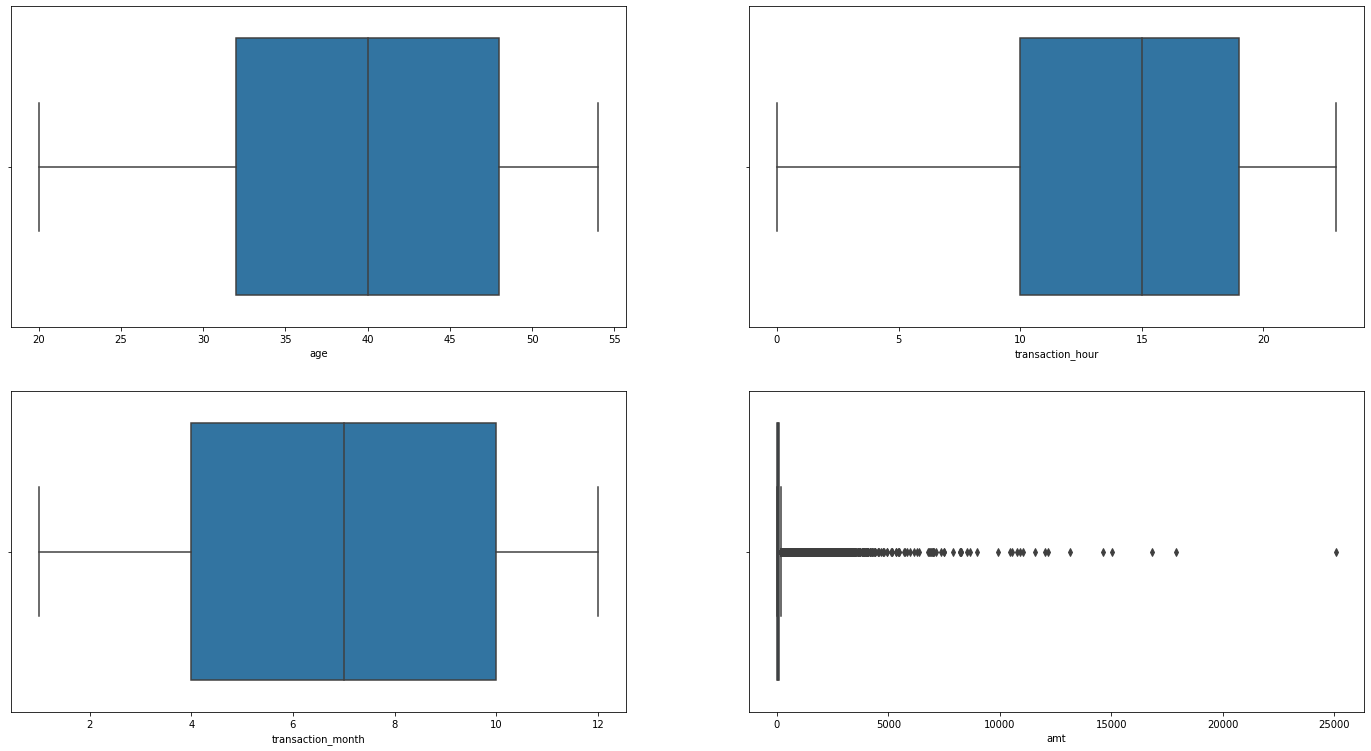

In [24]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,10))
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, top=0.99, wspace=None, hspace=0.2)

ax = axes.flatten()
sns.boxplot(cc_df['age'], ax = ax[0])
sns.boxplot(cc_df['transaction_hour'], ax = ax[1])
sns.boxplot(cc_df['transaction_month'], ax = ax[2])
sns.boxplot(cc_df['amt'], ax = ax[3])

### (5) 사기 발생 분석

#### 사기 발생 데이터프레임 생성

In [25]:
fraud_df = cc_df[cc_df['is_fraud'] == 1]
fraud_df

,cc_num,category,amt,gender,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age
4794,581686439828,gas_transport,11.73,M,41.5205,-80.0573,41.947427,-79.796264,1,0,1,5,51
4816,581686439828,grocery_pos,328.68,M,41.5205,-80.0573,42.148618,-79.398595,1,3,1,5,51
4979,581686439828,food_dining,120.58,M,41.5205,-80.0573,42.470024,-80.126576,1,15,1,5,51
5073,581686439828,shopping_net,1081.35,M,41.5205,-80.0573,42.455406,-79.521640,1,19,1,5,51
5124,581686439828,shopping_net,776.70,M,41.5205,-80.0573,40.680209,-79.099101,1,22,1,5,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,4716561796955522,grocery_pos,358.24,F,48.2777,-112.8456,47.526202,-113.643313,1,2,12,0,52
477847,4716561796955522,shopping_net,859.12,F,48.2777,-112.8456,48.272348,-112.328075,1,2,12,0,52
479296,4716561796955522,home,209.84,F,48.2777,-112.8456,49.173669,-112.698767,1,22,12,0,52
479305,4716561796955522,food_dining,123.58,F,48.2777,-112.8456,48.913048,-113.214921,1,22,12,0,52


#### 사기 현황 분석을 위한 그래프 그리기

- 나이별 전체 거래량과 사기거래량

In [26]:
cc_df['age'].sort_values().unique()

array([20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])

In [27]:
cc_df.groupby('age')['is_fraud'].count()

age
20     8037
21     3643
24     8751
25    15318
26    12423
27    24826
28     8031
29    18992
30     7291
31    11690
32     4375
33    10948
34    16046
35    12411
36    20441
37    20455
38     4385
39    27732
40    35019
41     8753
42     8026
43    12393
44    14609
45     4377
46    19669
47    19697
48    16051
49    24075
50    18991
51    14569
52    32126
53    16042
54    10942
Name: is_fraud, dtype: int64

In [28]:
fraud_df.groupby('age')['is_fraud'].sum()

age
20    21
21    10
24    14
25    58
26    33
27    82
28    31
29    57
30    22
31    36
32     3
33    31
34    43
35    30
36    44
37    54
38    14
39    57
40    84
41    15
42    24
43    23
44    44
45     4
46    34
47    51
48    37
49    50
50    64
51    34
52    93
53    25
54    22
Name: is_fraud, dtype: int64

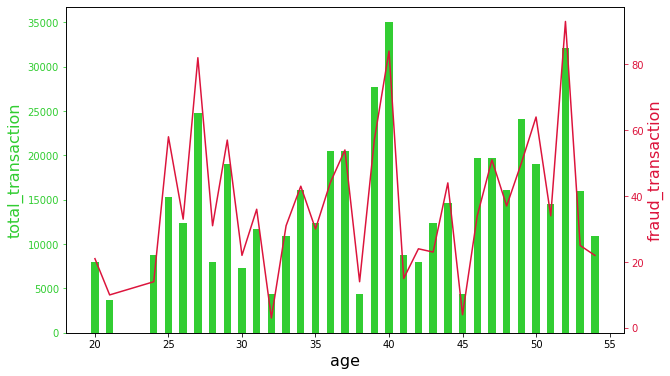

In [29]:
import matplotlib.ticker as ticker

x_value = cc_df['age'].sort_values().unique()
total = cc_df.groupby('age')['is_fraud'].count()
fraud = fraud_df.groupby('age')['is_fraud'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'limegreen'
ax1.set_xlabel('age', fontsize=16)
ax1.set_ylabel('total_transaction', fontsize=16, color=color)
ax1.bar(x_value, height=total, width=0.5, color=color)
ax1.tick_params(axis='y', colors=color)

ax2 = ax1.twinx()  # share the x-axis, new y-axis
color = 'crimson'
ax2.set_ylabel('fraud_transaction', fontsize=16, color=color)
ax2.plot(x_value, fraud, color=color)
ax2.tick_params(axis='y', colors=color)

plt.show()

- 요일별 전체 거래량과 사기거래량

In [30]:
cc_df['transaction_week'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [31]:
cc_df.groupby('transaction_week')['is_fraud'].count()

transaction_week
0    98667
1    70992
2    47949
3    53834
4    56346
5    69844
6    93502
Name: is_fraud, dtype: int64

In [32]:
fraud_df.groupby('transaction_week')['is_fraud'].sum()

transaction_week
0    258
1    174
2    114
3    168
4    143
5    177
6    210
Name: is_fraud, dtype: int64

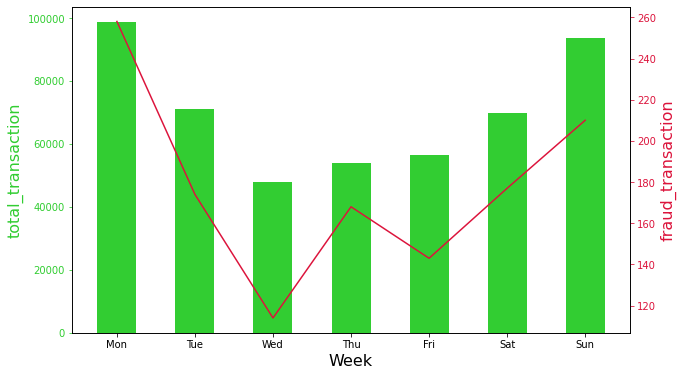

In [33]:
import matplotlib.ticker as ticker

x_value = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
total = cc_df.groupby('transaction_week')['is_fraud'].count()
fraud = fraud_df.groupby('transaction_week')['is_fraud'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'limegreen'
ax1.set_xlabel('Week', fontsize=16)
ax1.set_ylabel('total_transaction', fontsize=16, color=color)
ax1.bar(x_value, height=total, width=0.5, color=color)
ax1.tick_params(axis='y', colors=color)

ax2 = ax1.twinx()  # share the x-axis, new y-axis
color = 'crimson'
ax2.set_ylabel('fraud_transaction', fontsize=16, color=color)
ax2.plot(x_value, fraud, color=color)
ax2.tick_params(axis='y', colors=color)

plt.show()

- 시간대별 전체 거래량과 사기거래량

In [34]:
cc_df['transaction_hour'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [35]:
cc_df.groupby('transaction_hour')['is_fraud'].count()

transaction_hour
0     11532
1     11535
2     11654
3     11530
4     11362
5     11495
6     11393
7     11578
8     11536
9     11562
10    11486
11    11419
12    29456
13    29390
14    29227
15    29690
16    29629
17    29409
18    29516
19    29183
20    29192
21    29413
22    29393
23    29554
Name: is_fraud, dtype: int64

In [36]:
fraud_df.groupby('transaction_hour')['is_fraud'].sum()

transaction_hour
0     132
1     125
2     142
3     150
4      14
5      17
6       8
7      20
8      14
9      11
10     11
11      7
12      7
13     16
14      4
15      7
16     10
17      4
18      9
19     12
20     13
21     11
22    260
23    240
Name: is_fraud, dtype: int64

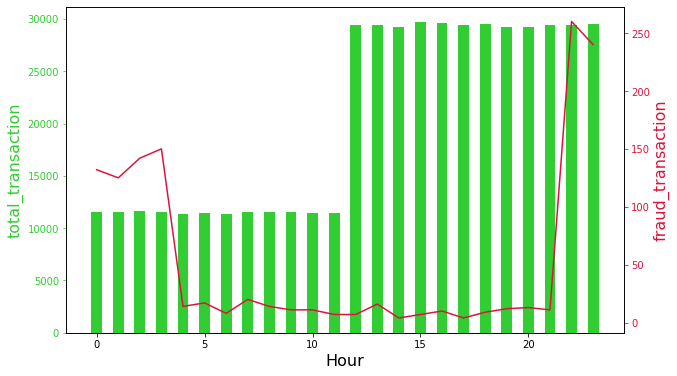

In [37]:
import matplotlib.ticker as ticker

x_value = cc_df['transaction_hour'].sort_values().unique()
total = cc_df.groupby('transaction_hour')['is_fraud'].count()
fraud = fraud_df.groupby('transaction_hour')['is_fraud'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'limegreen'
ax1.set_xlabel('Hour', fontsize=16)
ax1.set_ylabel('total_transaction', fontsize=16, color=color)
ax1.bar(x_value, height=total, width=0.5, color=color)
ax1.tick_params(axis='y', colors=color)

ax2 = ax1.twinx()  # share the x-axis, new y-axis
color = 'crimson'
ax2.set_ylabel('fraud_transaction', fontsize=16, color=color)
ax2.plot(x_value, fraud, color=color)
ax2.tick_params(axis='y', colors=color)

plt.show()

- 월별 전체 거래량과 사기거래량

In [38]:
cc_df['transaction_month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [39]:
cc_df.groupby('transaction_month')['is_fraud'].count()

transaction_month
1     27804
2     25843
3     37924
4     35905
5     38877
6     46239
7     45645
8     46738
9     37171
10    36492
11    37818
12    74678
Name: is_fraud, dtype: int64

In [40]:
fraud_df.groupby('transaction_month')['is_fraud'].sum()

transaction_month
1     160
2     113
3      74
4      70
5     136
6     144
7      43
8     163
9     102
10     45
11     77
12    117
Name: is_fraud, dtype: int64

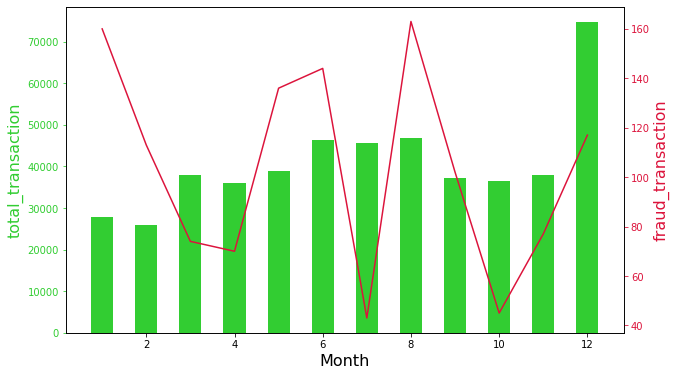

In [41]:
import matplotlib.ticker as ticker

x_value = cc_df['transaction_month'].sort_values().unique()
total = cc_df.groupby('transaction_month')['is_fraud'].count()
fraud = fraud_df.groupby('transaction_month')['is_fraud'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'limegreen'
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('total_transaction', fontsize=16, color=color)
ax1.bar(x_value, height=total, width=0.5, color=color)
ax1.tick_params(axis='y', colors=color)

ax2 = ax1.twinx()  # share the x-axis, new y-axis
color = 'crimson'
ax2.set_ylabel('fraud_transaction', fontsize=16, color=color)
ax2.plot(x_value, fraud, color=color)
ax2.tick_params(axis='y', colors=color)

plt.show()

### (6) Scaling

#### 원-핫 인코딩

In [42]:
cc_df.head()

,cc_num,category,amt,gender,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,0,0,1,1,46
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,40.079588,-74.848087,0,0,1,1,44
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,40.021888,-74.228188,0,0,1,1,50
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,42.360426,-83.552316,0,0,1,1,53
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,29.737426,-90.853194,0,0,1,1,47


In [43]:
cc_df[['category','gender']].nunique()

category    14
gender       2
dtype: int64

In [44]:
one_hot_df = pd.get_dummies(cc_df, columns = ['category','gender'], drop_first = True)

In [45]:
one_hot_df = one_hot_df.drop(['cc_num'], axis=1)

In [46]:
one_hot_df

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,107.23,48.8878,-118.2105,49.159047,-118.186462,0,0,1,1,46,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,44.71,40.6747,-74.2239,40.079588,-74.848087,0,0,1,1,44,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,46.28,40.6152,-74.4150,40.021888,-74.228188,0,0,1,1,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,64.09,42.2203,-83.3583,42.360426,-83.552316,0,0,1,1,53,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25.58,30.4066,-91.1468,29.737426,-90.853194,0,0,1,1,47,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,134.26,34.2651,-77.8670,34.853497,-78.664158,0,23,12,3,41,0,0,0,0,0,1,0,0,0,0,0,0,0,0
491130,25.49,34.0326,-82.2027,35.008839,-81.475156,0,23,12,3,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0
491131,111.84,29.0393,-95.4401,29.661049,-96.186633,0,23,12,3,25,0,0,0,0,0,0,1,0,0,0,0,0,0,1
491132,86.88,46.1966,-118.9017,46.658340,-119.715054,0,23,12,3,43,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [48]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [49]:
ss.fit(one_hot_df)

StandardScaler()

In [50]:
ss_df = pd.DataFrame(ss.transform(one_hot_df), columns = one_hot_df.columns)

In [51]:
rs.fit(one_hot_df)

RobustScaler()

In [52]:
rs_df = pd.DataFrame(rs.transform(one_hot_df), columns = one_hot_df.columns)

In [53]:
mm.fit(one_hot_df)

MinMaxScaler()

In [54]:
mm_df = pd.DataFrame(mm.transform(one_hot_df), columns = one_hot_df.columns)

In [55]:
ss_df.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.238144,2.051336,-2.133437,2.089860,-2.129411,-0.050392,-2.204406,-1.796625,-0.896653,0.686656,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,-0.298961,-0.232459,-0.265810,-0.279185,-0.294428,-0.330428,-0.162405,-0.627300
1,-0.151820,0.513644,1.252565,0.400023,1.203262,-0.050392,-2.204406,-1.796625,-0.896653,0.471546,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,-0.298961,-0.232459,-0.265810,-0.279185,-0.294428,-0.330428,-0.162405,1.594133
2,-0.142027,0.502504,1.237854,0.389284,1.250932,-0.050392,-2.204406,-1.796625,-0.896653,1.116876,-0.281159,-0.321577,4.365518,-0.308665,-0.26141,-0.311104,-0.298961,-0.232459,-0.265810,-0.279185,-0.294428,-0.330428,-0.162405,-0.627300
3,-0.030938,0.803018,0.549417,0.824525,0.533916,-0.050392,-2.204406,-1.796625,-0.896653,1.439541,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,-0.298961,-0.232459,-0.265810,-0.279185,-0.294428,-0.330428,-0.162405,1.594133
4,-0.271141,-1.408793,-0.050127,-1.524823,-0.027513,-0.050392,-2.204406,-1.796625,-0.896653,0.794211,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,-0.311104,-0.298961,-0.232459,3.762089,-0.279185,-0.294428,-0.330428,-0.162405,-0.627300


In [56]:
rs_df.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.911588,1.335331,-1.855224,1.353315,-1.878186,0.0,-1.666667,-1.0,-0.5,0.3750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035589,0.278821,0.809968,0.195650,0.780733,0.0,-1.666667,-1.0,-0.5,0.2500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.057587,0.271167,0.798389,0.188293,0.818765,0.0,-1.666667,-1.0,-0.5,0.6250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.307132,0.477643,0.256506,0.486465,0.246706,0.0,-1.666667,-1.0,-0.5,0.8125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.232451,-1.042039,-0.215407,-1.123014,-0.201221,0.0,-1.666667,-1.0,-0.5,0.4375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
mm_df.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.004235,1.000000,0.078944,0.972229,0.094864,0.0,0.0,0.0,0.166667,0.764706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001742,0.661065,0.918704,0.626104,0.891826,0.0,0.0,0.0,0.166667,0.705882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.001805,0.658610,0.915055,0.623905,0.903225,0.0,0.0,0.0,0.166667,0.882353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002515,0.724848,0.744317,0.713054,0.731761,0.0,0.0,0.0,0.166667,0.970588,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000980,0.237326,0.595624,0.231843,0.597503,0.0,0.0,0.0,0.166667,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
ss_df.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,491134.000000,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05,4.911340e+05
mean,-1.267343e-17,2.050521e-15,-3.052041e-15,-4.913126e-17,6.795912e-16,-1.261556e-17,-1.245353e-16,2.962922e-17,0.000000,-1.483197e-16,1.909696e-17,-6.076304e-18,-7.621421e-17,-4.317069e-17,-8.075697e-17,2.531793e-17,5.578626e-17,4.976782e-17,8.072804e-17,1.967565e-18,-7.395730e-17,9.646856e-17,-2.763272e-17,5.002824e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.244572e-01,-2.485502e+00,-2.451749e+00,-2.656716e+00,-2.526105e+00,-5.039192e-02,-2.204406e+00,-1.796625e+00,-1.349308,-2.109774e+00,-2.811586e-01,-3.215767e-01,-2.290679e-01,-3.086648e-01,-2.614101e-01,-3.111038e-01,-2.989612e-01,-2.324595e-01,-2.658098e-01,-2.791848e-01,-2.944280e-01,-3.304284e-01,-1.624052e-01,-6.273001e-01
25%,-3.748073e-01,-7.834456e-01,-5.187920e-01,-7.721756e-01,-4.990280e-01,-5.039192e-02,-6.435533e-01,-9.208328e-01,-0.896653,-8.191140e-01,-2.811586e-01,-3.215767e-01,-2.290679e-01,-3.086648e-01,-2.614101e-01,-3.111038e-01,-2.989612e-01,-2.324595e-01,-2.658098e-01,-2.791848e-01,-2.944280e-01,-3.304284e-01,-1.624052e-01,-6.273001e-01
50%,-1.676626e-01,1.078356e-01,2.235379e-01,1.144340e-01,2.246963e-01,-5.039192e-02,1.368733e-01,-4.504076e-02,0.008658,4.132598e-02,-2.811586e-01,-3.215767e-01,-2.290679e-01,-3.086648e-01,-2.614101e-01,-3.111038e-01,-2.989612e-01,-2.324595e-01,-2.658098e-01,-2.791848e-01,-2.944280e-01,-3.304284e-01,-1.624052e-01,-6.273001e-01
75%,7.035734e-02,6.719986e-01,7.516611e-01,6.875183e-01,7.543662e-01,-5.039192e-02,7.612146e-01,8.307513e-01,0.913969,9.017659e-01,-2.811586e-01,-3.215767e-01,-2.290679e-01,-3.086648e-01,-2.614101e-01,-3.111038e-01,-2.989612e-01,-2.324595e-01,-2.658098e-01,-2.791848e-01,-2.944280e-01,-3.304284e-01,-1.624052e-01,1.594133e+00
max,1.560471e+02,2.051336e+00,1.580360e+00,2.225441e+00,1.655617e+00,1.984445e+01,1.385556e+00,1.414613e+00,1.366624,1.547096e+00,3.556711e+00,3.109678e+00,4.365518e+00,3.239760e+00,3.825407e+00,3.214361e+00,3.344916e+00,4.301825e+00,3.762089e+00,3.581857e+00,3.396416e+00,3.026374e+00,6.157437e+00,1.594133e+00


In [59]:
rs_df.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,0.376631,-0.074091,-0.175951,-0.078396,-1.792703e-01,0.002533,-0.097435,0.025714,-0.004782,-0.024014,0.073259,0.093720,0.049856,0.086986,0.063964,0.088245,0.082045,0.051267,0.065992,0.072308,0.079773,0.098435,0.025698,0.282385
std,2.246362,0.687076,0.787122,0.685076,7.978344e-01,0.050264,0.711862,0.570912,0.552297,0.581099,0.260561,0.291439,0.217648,0.281815,0.244689,0.283651,0.274433,0.220542,0.248269,0.258998,0.270941,0.297903,0.158232,0.450160
min,-0.576853,-1.781818,-2.105774,-1.898446,-2.194682e+00,0.000000,-1.666667,-1.000000,-0.750000,-1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.465322,-0.612377,-0.584303,-0.607394,-5.774116e-01,0.000000,-0.555556,-0.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,4.359359e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.534678,0.387623,0.415697,0.392606,4.225884e-01,0.000000,0.444444,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,350.914530,1.335331,1.067983,1.446198,1.141637e+00,1.000000,0.888889,0.833333,0.750000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
mm_df.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,0.002713,0.547849,0.608056,0.544168,0.604083,0.002533,0.614047,0.559481,0.496812,0.576934,0.073259,0.093720,0.049856,0.086986,0.063964,0.088245,0.082045,0.051267,0.065992,0.072308,0.079773,0.098435,0.025698,0.282385
std,0.006391,0.220418,0.248009,0.204828,0.239136,0.050264,0.278555,0.311407,0.368198,0.273458,0.260561,0.291439,0.217648,0.281815,0.244689,0.283651,0.274433,0.220542,0.248269,0.258998,0.270941,0.297903,0.158232,0.450160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000317,0.375164,0.479391,0.386006,0.484747,0.000000,0.434783,0.272727,0.166667,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001641,0.571618,0.663496,0.567608,0.657815,0.000000,0.652174,0.545455,0.500000,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003162,0.695969,0.794475,0.684991,0.784479,0.000000,0.826087,0.818182,0.833333,0.823529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## (7) 위도 경도 

In [61]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [62]:
import geopy.distance

In [63]:
Seoul = (37.541, 126.986)  #Latitude, Longitude
Toronto = (43.65, -79.38)

# 거리 계산
#geopy.distance.distance((위도1, 경도1), (위도2, 경도2))
geopy.distance.distance(Seoul, Toronto)

Distance(10628.740950798918)

In [64]:
custom_loc = []

for i in zip(cc_df['lat'], cc_df['long']):
    custom_loc.append(i)

custom_loc

[(48.8878, -118.2105),
 (40.6747, -74.2239),
 (40.6152, -74.415),
 (42.2203, -83.3583),
 (30.4066, -91.1468),
 (40.6729, -73.5365),
 (32.153, -90.1217),
 (39.7562, -98.4462),
 (38.9999, -109.615),
 (48.34, -122.3456),
 (38.9999, -109.615),
 (44.0575, -69.9656),
 (48.2777, -112.8456),
 (39.8936, -79.7856),
 (35.5762, -91.4539),
 (39.5994, -105.0044),
 (44.3346, -73.098),
 (44.5995, -86.2141),
 (34.0326, -82.2027),
 (39.0298, -77.0793),
 (40.6152, -74.415),
 (33.6372, -96.6184),
 (40.6761, -91.0391),
 (36.9688, -78.5615),
 (32.5104, -86.8138),
 (34.7789, -86.5438),
 (41.2419, -81.7453),
 (37.0581, -86.1938),
 (40.0369, -75.0664),
 (39.5723, -90.2379),
 (40.732, -73.1),
 (38.7897, -93.8702),
 (43.2326, -86.2492),
 (32.8357, -79.8217),
 (39.5483, -119.7957),
 (41.4802, -86.6919),
 (33.5623, -112.0559),
 (34.3795, -118.523),
 (29.3641, -98.4924),
 (37.3272, -91.0243),
 (35.8596, -86.421),
 (42.5164, -82.9832),
 (31.929, -97.6443),
 (41.5205, -80.0573),
 (41.0646, -87.5917),
 (41.0646, -87.5

In [65]:
merch_loc = []

for i in zip(cc_df['merch_lat'], cc_df['merch_long']):
    merch_loc.append(i)

merch_loc

[(49.159047, -118.186462),
 (40.079588, -74.84808699999999),
 (40.021888, -74.228188),
 (42.360426, -83.552316),
 (29.737426, -90.853194),
 (40.202538, -73.859212),
 (31.939812, -90.726209),
 (40.332519, -99.062962),
 (39.807313, -109.348294),
 (48.682111, -122.719904),
 (38.419431, -109.380252),
 (43.585423, -70.449359),
 (49.080153, -113.53238),
 (39.222743, -78.839099),
 (36.144895, -92.188172),
 (39.335171, -104.102882),
 (45.084808, -73.626071),
 (44.630758, -87.12389399999999),
 (33.828472999999995, -81.642924),
 (38.394608000000005, -76.437916),
 (40.813669, -75.283465),
 (34.266941, -96.709668),
 (40.7433, -90.088705),
 (36.822396000000005, -78.452392),
 (33.347838, -86.819795),
 (33.816815000000005, -86.429446),
 (42.206551, -81.59184499999999),
 (36.784818, -86.36912199999999),
 (39.220115, -74.711564),
 (39.575819, -90.149623),
 (40.711398, -73.523504),
 (38.995701, -93.569356),
 (44.036016, -86.754147),
 (33.791152000000004, -80.788125),
 (38.573952, -120.084189),
 (41.5372

In [66]:
cc_df['custom_loc'] = custom_loc
cc_df['custom_loc']

0         (48.8878, -118.2105)
1          (40.6747, -74.2239)
2           (40.6152, -74.415)
3          (42.2203, -83.3583)
4          (30.4066, -91.1468)
                  ...         
491129      (34.2651, -77.867)
491130     (34.0326, -82.2027)
491131     (29.0393, -95.4401)
491132    (46.1966, -118.9017)
491133     (35.6665, -97.4798)
Name: custom_loc, Length: 491134, dtype: object

In [67]:
cc_df['merch_loc'] = merch_loc
cc_df['merch_loc']

0                (49.159047, -118.186462)
1         (40.079588, -74.84808699999999)
2                 (40.021888, -74.228188)
3                 (42.360426, -83.552316)
4                 (29.737426, -90.853194)
                       ...               
491129            (34.853497, -78.664158)
491130    (35.008839, -81.47515600000001)
491131            (29.661049, -96.186633)
491132            (46.65834, -119.715054)
491133            (36.210097, -97.036372)
Name: merch_loc, Length: 491134, dtype: object

In [68]:
cc_df

,cc_num,category,amt,gender,lat,long,merch_lat,merch_long,is_fraud,transaction_hour,transaction_month,transaction_week,age,custom_loc,merch_loc
0,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,0,0,1,1,46,"(48.8878, -118.2105)","(49.159047, -118.186462)"
1,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,40.079588,-74.848087,0,0,1,1,44,"(40.6747, -74.2239)","(40.079588, -74.84808699999999)"
2,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,40.021888,-74.228188,0,0,1,1,50,"(40.6152, -74.415)","(40.021888, -74.228188)"
3,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,42.360426,-83.552316,0,0,1,1,53,"(42.2203, -83.3583)","(42.360426, -83.552316)"
4,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,29.737426,-90.853194,0,0,1,1,47,"(30.4066, -91.1468)","(29.737426, -90.853194)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,34.2651,-77.8670,34.853497,-78.664158,0,23,12,3,41,"(34.2651, -77.867)","(34.853497, -78.664158)"
491130,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,35.008839,-81.475156,0,23,12,3,40,"(34.0326, -82.2027)","(35.008839, -81.47515600000001)"
491131,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,29.661049,-96.186633,0,23,12,3,25,"(29.0393, -95.4401)","(29.661049, -96.186633)"
491132,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,46.658340,-119.715054,0,23,12,3,43,"(46.1966, -118.9017)","(46.65834, -119.715054)"


In [ ]:
cc_df['distance'] = cc_df.apply(lambda x: geopy.distance.distance(x['custom_loc'], x['merch_loc']), axis = 1)

In [ ]:
cc_df['distance'] 